In [1162]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts
pd.options.display.float_format = '{:,}'.format

In [1163]:
# Files needed
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [1164]:
# Reads the city data file and stores it in a pandas DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
...,...,...,...
115,Bradshawfurt,7,Rural
116,New Ryantown,2,Rural
117,Randallchester,9,Rural
118,Jessicaport,1,Rural


In [1165]:
# Reads the ride data file and stores it in a pandas DataFrame.
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [1166]:
# Gets the columns and the rows that are not null.
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [1167]:
# gets count of null values in the columns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [1168]:
# Gets the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [1169]:
# Gets the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [1170]:
# Returns the number of data points from the Urban cities.
sum(city_data_df["type"]=="Urban")

66

In [1171]:
# Returns the number of data points from the Urban cities.
sum(city_data_df["type"]=="Suburban")

36

In [1172]:
# Returns the number of data points from the Urban cities.
sum(city_data_df["type"]=="Rural")

18

In [1173]:
# Returns the columns and the rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [1174]:
# Returns count of columns and the rows that are null
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [1175]:
# Gets the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [1176]:
# Combines the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how= "left", on = ["city", "city"])

# Displays DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1177]:
# Makes Urban dataframe
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [1178]:
# Makes dataframes for other city types
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [1179]:
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.9,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.8,4018025271936,2,Rural


In [1180]:
# Gets the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [1181]:
# Creates the suburban and rural ride count
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [1182]:
# Gets average fare for each urban city 
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

city
Amandaburgh       24.641666666666666
Barajasview       25.332272727272724
Carriemouth       28.314444444444437
Christopherfurt    24.50185185185185
Deanville         25.842631578947366
Name: fare, dtype: float64

In [1183]:
# Gets average fare for each city in the suburban and rural cities
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]

In [1184]:
# Get the average number of drivers for urban dataframe
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
urban_driver_count.head()

city
Amandaburgh       12.0
Barajasview       26.0
Carriemouth       52.0
Christopherfurt   41.0
Deanville         49.0
Name: driver_count, dtype: float64

In [1185]:
# Gets the average number of drivers for suburban and rural cities
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]

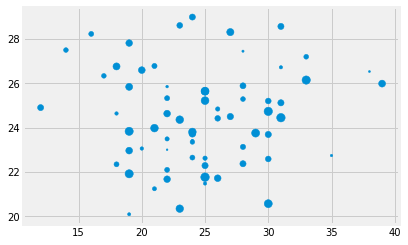

In [1186]:
# Creates scatter plot based on data for urban cities
plt.scatter(urban_ride_count, urban_avg_fare, s = urban_driver_count)

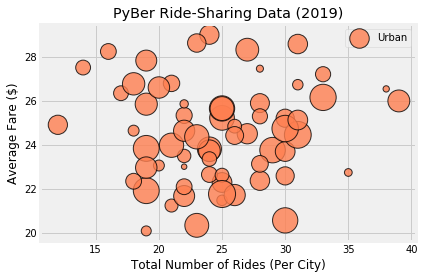

In [1187]:
# Creates scatter plot based on suburban data and adds legend
plt.scatter(urban_ride_count, urban_avg_fare,
      s = 10 * urban_driver_count, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

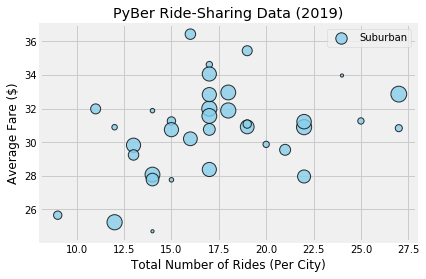

In [1188]:
# Makes scatter plot for suburban cities and adds legend
plt.scatter(suburban_ride_count, suburban_avg_fare,
      s = 10 * suburban_driver_count, c = "skyblue",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

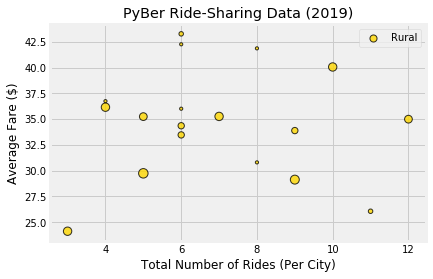

In [1189]:
# Makes scatter plot for rural cities and adds legend
plt.scatter(rural_ride_count, rural_avg_fare,
      s = 10 * rural_driver_count, c = "gold",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

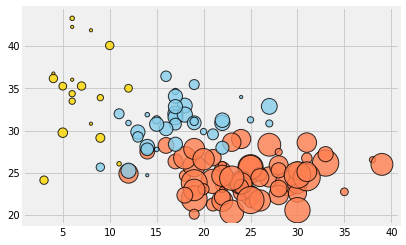

In [1190]:
# superimposes charts together)
plt.scatter(urban_ride_count, urban_avg_fare,
      s = 10 * urban_driver_count, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")
plt.scatter(suburban_ride_count, suburban_avg_fare,
      s = 10 * suburban_driver_count, c = "skyblue",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Suburban")
plt.scatter(rural_ride_count, rural_avg_fare,
      s = 10 * rural_driver_count, c = "gold",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Rural")
# shows splatter chart 
plt.show()


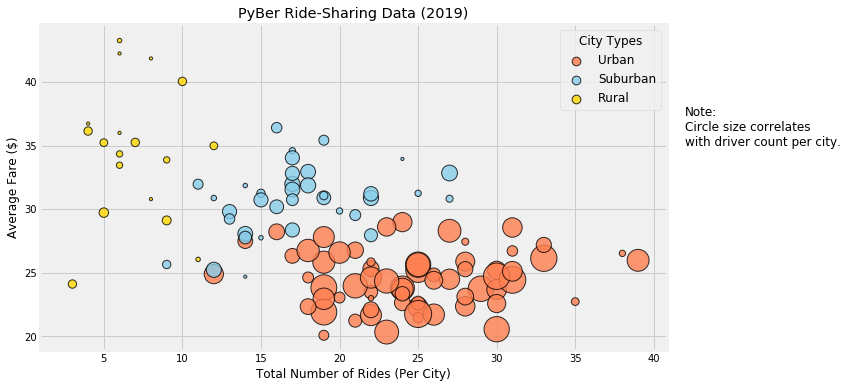

In [1191]:
# superimposes charts together on larger scale
plt.subplots(figsize = (10, 6))
plt.scatter(urban_ride_count, urban_avg_fare,
      s = 10 * urban_driver_count, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")

plt.scatter(suburban_ride_count, suburban_avg_fare,
      s = 10 * suburban_driver_count, c = "skyblue",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
      s = 10 * rural_driver_count, c = "gold",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Rural")

# Adds title, labels and grid
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

# adds legend
lgnd = plt.legend(fontsize="12", mode="Expanded", scatterpoints = 1,
                  loc="best", title= "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
# adds a note to viewer regarding circle size significance
plt.text(42, 35, "Note:\nCircle size correlates\nwith driver count per city.", fontsize = "12")

# Saves the figure to analysis folder
plt.savefig("analysis/Fig1.png")

# shows splatter chart 
plt.show()


In [1192]:
# Gets sumamry statistics of one city type at a time:
urban_cities_df.describe()

,fare,ride_id,driver_count
count,"1,625.0","1,625.0","1,625.0"
mean,24.52577230769236,"4,873,484,716,342.211",36.67815384615385
std,11.73864854822584,"2,907,439,737,047.0083",20.07554504627179
min,4.05,"14,588,103,145.0",3.0
25%,14.55,"2,400,244,207,933.0",22.0
50%,24.64,"4,711,188,257,853.0",37.0
75%,34.58,"7,451,578,628,999.0",52.0
max,44.97,"9,991,537,657,885.0",73.0


In [1193]:
suburban_cities_df.describe()

,fare,ride_id,driver_count
count,625.0,625.0,625.0
mean,30.97012800000002,"4,971,015,236,122.825",13.712
std,10.677507826315356,"2,912,409,772,349.337",8.042371763960164
min,12.05,"321,833,677.0",1.0
25%,21.97,"2,364,252,847,065.0",5.0
50%,30.75,"5,053,221,471,789.0",16.0
75%,39.83,"7,551,674,475,043.0",21.0
max,49.96,"9,917,743,781,176.0",25.0


In [1194]:
rural_cities_df.describe()

,fare,ride_id,driver_count
count,125.0,125.0,125.0
mean,34.623440000000016,"4,647,745,922,730.296",4.296
std,14.558045503343479,"2,887,833,634,124.8516",2.691156364956364
min,10.11,"26,848,733,115.0",1.0
25%,19.9,"2,275,364,435,623.0",1.0
50%,37.05,"4,023,962,353,348.0",4.0
75%,47.07,"7,118,046,558,393.0",7.0
max,58.55,"9,990,581,345,298.0",9.0


In [1195]:
# Gets summary statistics for urban cities
urban_ride_count.describe()

count                66.0
mean    24.62121212121212
std     5.408725575799936
min                  12.0
25%                  21.0
50%                  24.0
75%                  28.0
max                  39.0
Name: ride_id, dtype: float64

In [1196]:
# Gets summary statistics for suburban cities
suburban_ride_count.describe()

count                 36.0
mean     17.36111111111111
std     4.3237072570242825
min                    9.0
25%                   14.0
50%                   17.0
75%                  19.25
max                   27.0
Name: ride_id, dtype: float64

In [1197]:
# Gets summary statistics for rural cities
rural_ride_count.describe()

count                 18.0
mean     6.944444444444445
std     2.5081566285227512
min                    3.0
25%                   5.25
50%                    6.0
75%                   8.75
max                   12.0
Name: ride_id, dtype: float64

In [1198]:
# Calculate the mean of the ride count for each city type.
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [1199]:
# Calculate the median for all the city types
round(urban_ride_count.median(),2), round(suburban_ride_count.median(),2), round(rural_ride_count.median(),2)

(24.0, 17.0, 6.0)

In [1200]:
# Calculate the mode for all the city types
round(urban_ride_count.mode(),2), round(suburban_ride_count.mode(),2), round(rural_ride_count.mode(),2)


(0    22
 1    25
 dtype: int64,
 0    17
 dtype: int64,
 0    6
 dtype: int64)

In [1201]:
# calculates the measures of central tendancy for urban ride count
mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean for the ride counts for urban trips is{mean_urban_ride_count: .2f}.")
median_urban_ride_count = np.median(urban_ride_count)
print(f"The median for the ride counts for urban trips is {median_urban_ride_count:}.")
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count}.")

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.0.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [1202]:
# calculates the measures of central tendancy for suburban ride count
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f"The mean for the ride counts for suburban trips is{mean_suburban_ride_count: .2f}.")

median_suburban_ride_count = np.median(suburban_ride_count)
print(f"The median for the ride counts for suburban trips is {median_suburban_ride_count:}.")

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.")

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.0.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [1203]:
# calculates the measures of central tendancy for rural ride count
mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean for the ride counts for rural trips is{mean_rural_ride_count: .2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median for the ride counts for rural trips is {median_rural_ride_count:}.")

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count}.")

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.0.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


In [1204]:
# Analysis process for average fare per city starts here
# This gets fares for all cities from their respective dataframe
urban_fares = urban_cities_df["fare"]
suburban_fares = suburban_cities_df["fare"]
rural_fares = rural_cities_df["fare"]
urban_fares.head(10)

0   13.83
1   30.24
2   33.44
3   23.44
4   34.58
5    9.52
6   43.25
7   35.98
8   35.09
9   42.81
Name: fare, dtype: float64

In [1205]:
# Calculates the mean median and mode for average fair of urban cities
mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare price for urban trips is ${mean_urban_fares:.2f}.")

median_urban_fares = np.median(urban_fares)
print(f"The median fare price for urban trips is ${median_urban_fares:.2f}.")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode fare price for urban trips is {mode_urban_fares}.")

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is ModeResult(mode=array([22.86]), count=array([5])).


In [1206]:
# Calculates the mean median and mode for average fair of suburban cities
mean_suburban_fares = np.mean(suburban_fares)
print(f"The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.")

median_suburban_fares = np.median(suburban_fares)
print(f"The median fare price for suburban trips is ${median_suburban_fares:.2f}.")

mode_suburban_fares = sts.mode(suburban_fares)
print(f"The mode fare price for suburban trips is {mode_suburban_fares}.")

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is ModeResult(mode=array([17.99]), count=array([3])).


In [1207]:
# Calculates the mean median and mode for average fair of rural cities
mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare price for rural trips is ${mean_rural_fares:.2f}.")

median_rural_fares = np.median(rural_fares)
print(f"The median fare price for rural trips is ${median_rural_fares:.2f}.")

mode_rural_fares = sts.mode(urban_fares)
print(f"The mode fare price for rural trips is {mode_rural_fares}.")

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is ModeResult(mode=array([22.86]), count=array([5])).


In [1208]:
# Gets driver count for all cities from their dataframes
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [1209]:
# Calculates the mean median and mode for number of drivers in urban cities
mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number drivers for urban cities is ${mean_urban_drivers:.2f}.")

median_urban_drivers= np.median(urban_drivers)
print(f"The median number of drivers for urban cities is ${median_urban_drivers:.2f}.")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers for urban cities is {mode_urban_drivers}.")

The mean number drivers for urban cities is $36.68.
The median number of drivers for urban cities is $37.00.
The mode number of drivers for urban cities is ModeResult(mode=array([39], dtype=int64), count=array([86])).


In [1210]:
# Calculates the mean median and mode for number of drivers in sub cities
mean_suburban_drivers = np.mean(suburban_drivers)
print(f"The mean number drivers for suburban cities is ${mean_suburban_drivers:.2f}.")

median_suburban_drivers= np.median(suburban_drivers)
print(f"The median number of drivers for suburban cities is ${median_suburban_drivers:.2f}.")

mode_suburban_drivers = sts.mode(suburban_drivers)
print(f"The mode number of drivers for suburban cities is {mode_suburban_drivers}.")

The mean number drivers for suburban cities is $13.71.
The median number of drivers for suburban cities is $16.00.
The mode number of drivers for suburban cities is ModeResult(mode=array([20], dtype=int64), count=array([79])).


In [1211]:
# Calculates the mean median and mode for number of drivers in urban cities
mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number drivers for rural cities is ${mean_rural_drivers:.2f}.")

median_rural_drivers= np.median(rural_drivers)
print(f"The median number of drivers for rural cities is ${median_rural_drivers:.2f}.")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers for rural cities is {mode_rural_drivers}.")

The mean number drivers for rural cities is $4.30.
The median number of drivers for rural cities is $4.00.
The mode number of drivers for rural cities is ModeResult(mode=array([1], dtype=int64), count=array([32])).


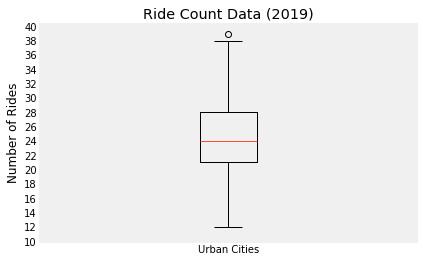

In [1212]:
# creates a box and whisker plot for urban cities ride count
x_labels = ["Urban Cities"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels = x_labels)

#adds title, y axis, label, and grid
ax.set_title("Ride Count Data (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10, 41, step = 2.0))
ax.grid()
plt.show()

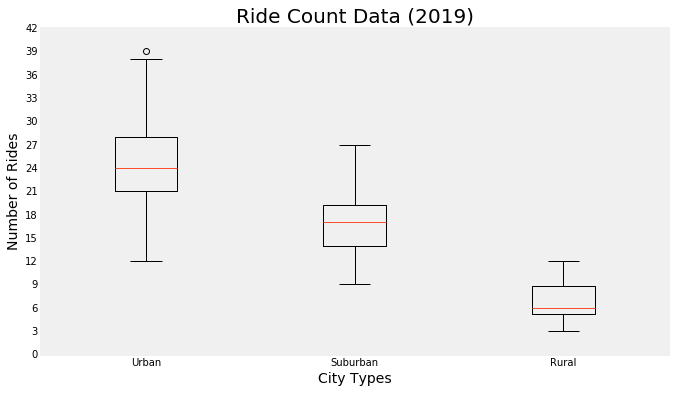

In [1213]:
# Adds all the ride count box & whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Rides',fontsize = 14)
ax.set_xlabel("City Types",fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 45, step = 3.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig2.png")
plt.show()

In [1214]:
# Retrieves and print out outlier, which is 39
urban_city_outlier = urban_ride_count[urban_ride_count == 39].index[0]
print(f"{urban_city_outlier} has the highest rider count.")

West Angela has the highest rider count.


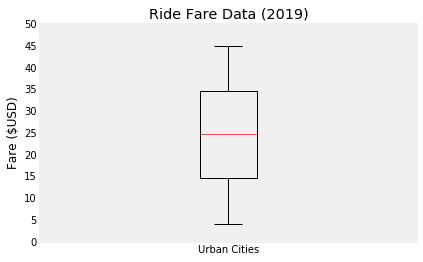

Summary Statistics


count             1,625.0
mean    24.52577230769236
std     11.73864854822584
min                  4.05
25%                 14.55
50%                 24.64
75%                 34.58
max                 44.97
Name: fare, dtype: float64

In [1215]:
# Creates a box & whisker plot for the urban fare data
x_labels = ["Urban Cities"]
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)
# Add the title, y-axis, label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

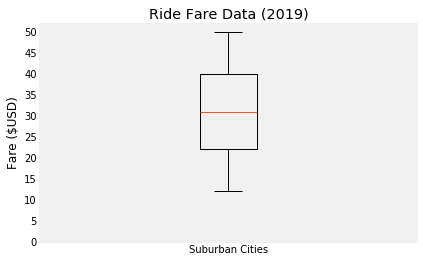

Summary Statistics


count                625.0
mean     30.97012800000002
std     10.677507826315356
min                  12.05
25%                  21.97
50%                  30.75
75%                  39.83
max                  49.96
Name: fare, dtype: float64

In [1216]:
# Creates a box & whisker plot for the urban fare data
x_labels = ["Suburban Cities"]
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)
# Add the title, y-axis, label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

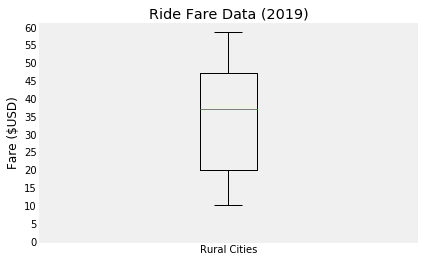

Summary Statistics


count                125.0
mean    34.623440000000016
std     14.558045503343479
min                  10.11
25%                   19.9
50%                  37.05
75%                  47.07
max                  58.55
Name: fare, dtype: float64

In [1217]:
# Creates a box & whisker plot for the rural fare data
x_labels = ["Rural Cities"]
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)
# Add the title, y-axis, label, and grid
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare ($USD)')
ax.set_yticks(np.arange(0, 65, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

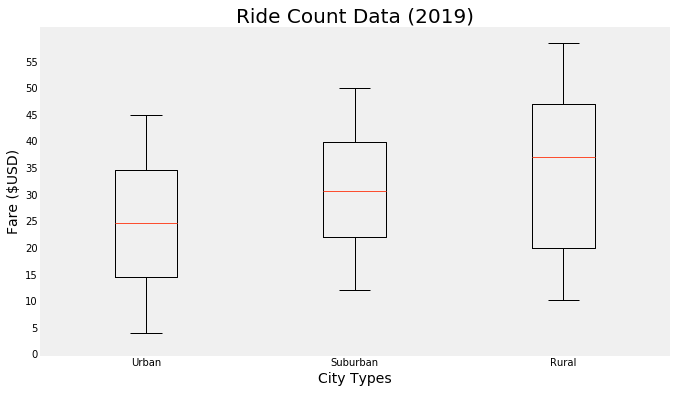

In [1218]:
# Adds all the average fare box & whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Fare ($USD)', fontsize = 14)
ax.set_xlabel("City Types",fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 60, step = 5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig3.png")
plt.show()

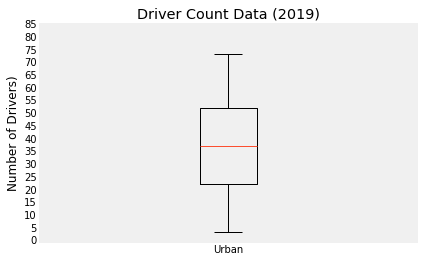

Summary Statistics


count             1,625.0
mean    36.67815384615385
std     20.07554504627179
min                   3.0
25%                  22.0
50%                  37.0
75%                  52.0
max                  73.0
Name: driver_count, dtype: float64

In [1219]:
# Creates the box & whisker plot for the urban driver count data
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers,labels=x_labels)
# Adds the title, y-axis, label, and grid
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

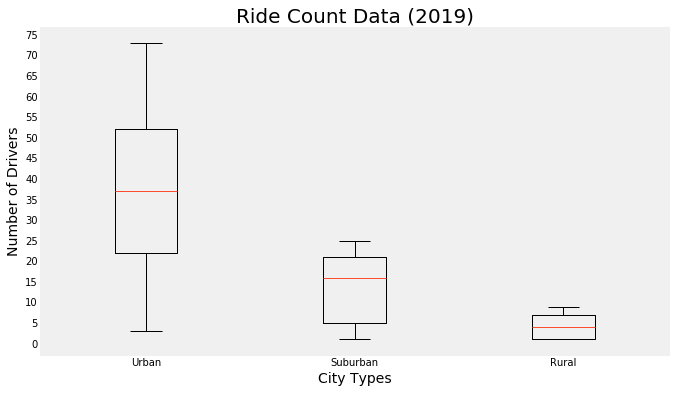

In [1220]:
# Adds all the driver count box & whisker plots to the same graph
x_labels = ["Urban", "Suburban","Rural"]
ride_count_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize = (10, 6))
ax.set_title('Ride Count Data (2019)', fontsize = 20)
ax.set_ylabel('Number of Drivers', fontsize = 14)
ax.set_xlabel("City Types",fontsize = 14)
ax.boxplot(ride_count_data, labels = x_labels)
ax.set_yticks(np.arange(0, 80, step = 5.0))
ax.grid()
# Save the figure.
plt.savefig("analysis/Fig4.png")
plt.show()

In [1221]:
# Starts next portion of analysis regarding % total fares by city type
# Gets the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_fares_by_type

type
Rural       4,327.930000000002
Suburban   19,356.330000000013
Urban      39,854.380000000085
Name: fare, dtype: float64

In [1222]:
# Gets the sum of all the fares
total_fares = pyber_data_df["fare"].sum()
total_fares

63538.64

In [1223]:
# Calculates the percentage of fare for each city type
type_percents = sum_fares_by_type / total_fares * 100
type_percents

type
Rural      6.811492974983414
Suburban   30.46387206273224
Urban       62.7246349622845
Name: fare, dtype: float64

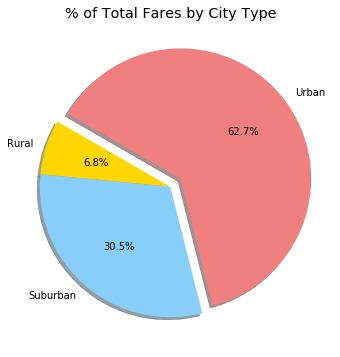

In [1224]:
# Import mpl to change the plot configurations using rcParams.
import matplotlib as mpl
# Creates the percentage of fares by city-type pie charts
plt.subplots(figsize=(10, 6))
plt.pie(type_percents,
    labels = ["Rural", "Suburban", "Urban"],
    colors = ["gold", "lightskyblue", "lightcoral"],
    explode = [0, 0, 0.1],
    autopct = '%1.1f%%',
    shadow = True, startangle = 150)
plt.title("% of Total Fares by City Type")
# Show Figure
plt.show()

In [1225]:
pyber_data_df.groupby(["type"])

In [1226]:
pyber_data_df["ride_id"].count()

2375

In [1227]:
# Calculates the percentage of rides for each city type
ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df["ride_id"].count() * 100
ride_percents

type
Rural      5.263157894736842
Suburban   26.31578947368421
Urban      68.42105263157895
Name: ride_id, dtype: float64

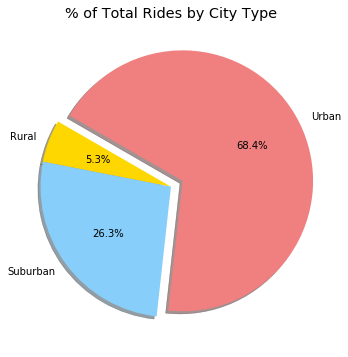

In [1228]:
# Builds percentage of rides by city type pie chart
plt.subplots(figsize = (10, 6))
plt.pie(ride_percents,
    labels=["Rural", "Suburban", "Urban"],
    colors=["gold", "lightskyblue", "lightcoral"],
    explode=[0, 0, 0.1], autopct = '%1.1f%%',
    shadow=True, startangle = 150)
plt.title("% of Total Rides by City Type")
# Changes the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Saves Figure
plt.savefig("analysis/Fig6.png")
# Shows Figure
plt.show()

In [1229]:
# Calculates the percentage of drivers for each city type
driver_percents = pyber_data_df.groupby(["type"]).sum()["driver_count"] / pyber_data_df["driver_count"].sum() * 100
driver_percents

type
Rural      0.7815570012662096
Suburban   12.472892925235413
Urban       86.74555007349838
Name: driver_count, dtype: float64

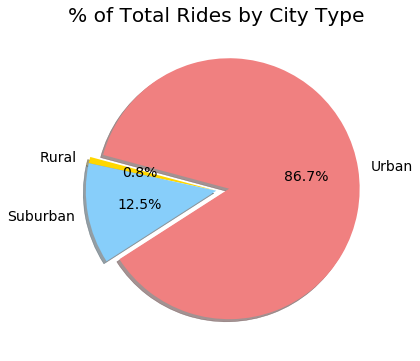

In [1230]:
# Builds percentage of rides by city type pie chart.
plt.subplots(figsize = (10, 6))
plt.pie(driver_percents,
    labels = ["Rural", "Suburban", "Urban"],
    colors = ["gold", "lightskyblue", "lightcoral"],
    explode = [0, 0, 0.1], autopct = '%1.1f%%',
    shadow = True, startangle = 165)
plt.title("% of Total Rides by City Type")
# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14
# Save Figure
plt.savefig("analysis/Fig7.png")
# Show Figure
plt.show()

In [1231]:
# This is the beginning of the summary dataframe (challenge)
total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
new_df = pd.DataFrame()

In [1232]:
# This will add the total rides, drivers and sum fares by type in columns
new_df["Total Rides"] = total_rides
new_df["Total Drivers"] = total_drivers
new_df["Total Fares"] = round(sum_fares_by_type, 2)
new_df

,Total Rides,Total Drivers,Total Fares
type,,,
Rural,125,78,"4,327.93"
Suburban,625,490,"19,356.33"
Urban,1625,2405,"39,854.38"


In [1233]:
# This will round for formatting
new_df["Average Fare per Ride"] = round(sum_fares_by_type / total_rides, 2)
new_df["Average Fare per Driver"] = round(sum_fares_by_type / total_drivers, 2)
new_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.5
Urban,1625,2405,"39,854.38",24.53,16.57


In [1234]:
# Makes a copy to properly read new dataframe
new_df2 = new_df.rename_axis(None)
summary_df = new_df2.copy()
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"4,327.93",34.62,55.49
Suburban,625,490,"19,356.33",30.97,39.5
Urban,1625,2405,"39,854.38",24.53,16.57


In [1235]:
# Formatting for commas and dollar signs
summary_df["Total Fares"] = summary_df["Total Fares"].map("${:,}".format)
summary_df["Average Fare per Driver"] = summary_df["Average Fare per Driver"].map("${:,.2f}".format)
summary_df["Average Fare per Ride"] = summary_df["Average Fare per Ride"].map("${:,}".format)
summary_df["Total Rides"] = summary_df["Total Rides"].map("{:,}".format)
summary_df["Total Drivers"] = summary_df["Total Drivers"].map("{:,}".format)
summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625","2,405","$39,854.38",$24.53,$16.57


In [1236]:
# Renames columns of pyber data and sets index
pyber_data_df = pyber_data_df.rename(columns = {'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})
pyber_data_df

,City,Date,Fare,Ride Id,No. Drivers,City Type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [1237]:
# Sets index to the date and makes a copy
pyber_data_df['Date'] = pyber_data_df['Date'].str.split(' ',expand=True)[0]
pyber_data_df["Date"] = pd.to_datetime(pyber_data_df["Date"])

pyber_data_df = pyber_data_df.set_index("Date")
chart_df = pyber_data_df[["City Type", "Fare"]].copy()
chart_df


,City Type,Fare
Date,,
2019-01-14,Urban,13.83
2019-03-04,Urban,30.24
2019-02-24,Urban,33.44
2019-02-10,Urban,23.44
2019-03-06,Urban,34.58
...,...,...
2019-04-29,Rural,13.38
2019-01-30,Rural,20.76
2019-02-10,Rural,11.11


In [1238]:
# This groups together the dataframe by city type and date, then sums the fare
sum_fares_by_date = chart_df.groupby(["Date", "City Type"]).sum()["Fare"]
sum_fares_by_date = pd.DataFrame(sum_fares_by_date)
sum_fares_by_date.reset_index()

,Date,City Type,Fare
0,2019-01-01,Rural,43.69
1,2019-01-01,Suburban,128.52
2,2019-01-01,Urban,127.78
3,2019-01-02,Rural,52.12
4,2019-01-02,Suburban,274.92
...,...,...,...
329,2019-05-06,Urban,181.2
330,2019-05-07,Rural,44.94
331,2019-05-07,Suburban,274.09
332,2019-05-07,Urban,258.01


In [1239]:
# Gets the pivot table with the fares for each city type per date
chart_df2 = pd.pivot_table(sum_fares_by_date, columns = "City Type", index = "Date")
new_chart_df = chart_df2.rename_axis(None)
new_chart_df

Fare                                      
City Type   Rural           Suburban              Urban
2019-01-01  43.69             128.52             127.78
2019-01-02  52.12             274.92 305.98999999999995
2019-01-03   19.9             133.48 260.47999999999996
2019-01-04  24.88              20.69             258.14
2019-01-05    nan 101.36000000000001             506.89
...           ...                ...                ...
2019-05-04    nan  91.71000000000001  323.5700000000001
2019-05-05  26.53             154.78              322.1
2019-05-06 111.88              34.12              181.2
2019-05-07  44.94             274.09             258.01
2019-05-08    nan                nan             170.82

[128 rows x 3 columns]

In [1240]:
# Limits range to the desired dates
new_chart_df = new_chart_df.loc['2019-01-1':'2019-04-28']

In [1241]:
# Groups together the dataframe by week in order to clear out nans and normalize data
new_chart_df = new_chart_df.resample('W').sum()

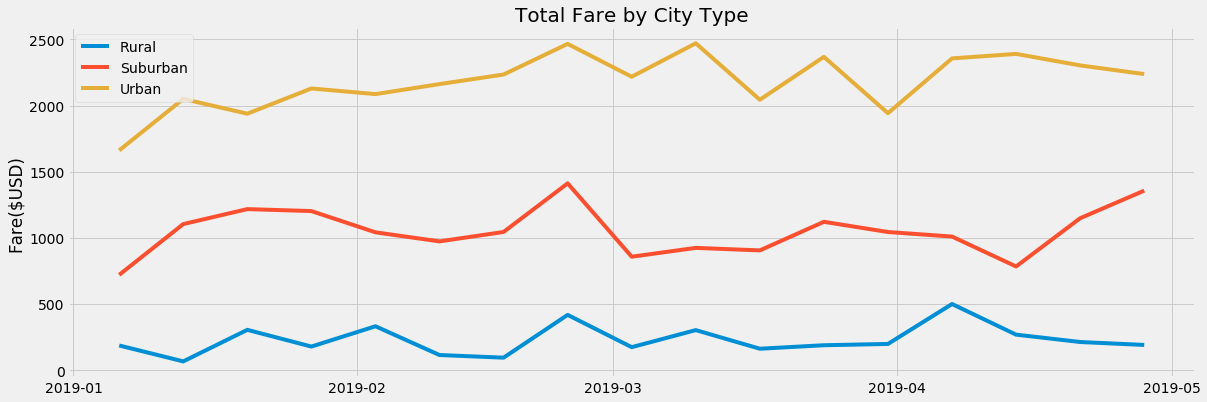

In [1259]:
# imports datetime configuration
import matplotlib.dates as mdates
# Formats the chart
plt.style.use('fivethirtyeight')
fig, chart = plt.subplots(figsize = (18, 6))
chart.set_title('Total Fare by City Type', fontsize = 20)
# Sets axis labels, legend, and plots
plt.ylabel("Fare($USD)")
chart.plot(new_chart_df, label = x_labels)
chart.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
chart.legend(["Rural", "Suburban", "Urban"], loc="upper left");
# saves figure and shows
plt.savefig("analysis/Fig8.png")
plt.show()